In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, os, sys, gc

import h5py 

import svgutils.transform as sg 
import sys 

import matplotlib.patches as patches

from scipy.integrate import solve_ivp

import class_energy as energy
import class_equations_of_motion as eom 

import class_handle_input as h_in
import class_handle_wavefunctions as h_wavef

import class_visualization as vis
import class_mass_size as mass_size

In [2]:
def get_E_arr(Mx_list, My_list, folder, check_sys):
    h5_io_object = h_in.io_hdf5()
    
    E_s_arr = np.zeros(len(Mx_list), dtype=complex)
    for i in range(len(Mx_list)):
        Mx = Mx_list[i]
        My = My_list[i]

        check_sym = 'Mx_'+str(Mx)+'_My_'+str(My)+'.'
        file_list = [f for f in os.listdir(folder) if check_sys in f and check_sym in f]

        if len(file_list) > 1: 
            break
        for file in file_list:
            file_name = folder+file
            psi, params = h5_io_object.get_psi(file_name)

            energy_object = energy.energy(params=params)
            E, E_T, E_B, E_V = energy_object.calc_energy(psi)
            E_s_arr[i] = E
    return E_s_arr

In [3]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            #axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_Mx/2))%chosen_Mx], color='lightcoral')


            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3) #.set_visible(False)

    #axs[0, 0].set_theta_zero_location('E')
    #lines, labels = axs[0, 0].set_thetagrids((0, 45, 90, 135, 180), (r'0', ' ', r'$\pi/2$', ' ', r'$\pi$'))

In [4]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"Mx_display": 4,
"converge_new_lattice": "no",
"My": 6,
"My_display": 4,
"B": 1.0,
"tx": 100,
"ty": 100,
"V_0": 150.0,
"qx": 0,
"qy": 0,
"init_choice": "uniform",
"external_wf_tag": " ",
"excitation_no": 11,
"angle_pattern": [0,0,0,0],
"V_0_pattern": [0,0,0,0],
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-7}

x = (2*np.pi/params["n"])*np.arange(params["n"])

''' 
I/O Objects
'''
h5_io_object = h_in.io_hdf5()

check_sys = 'tx_'+str(params["tx"])+'_ty_'+str(params["ty"])+'_V0_'+str(params["V_0"])

[0.05032844-6.48212508e-20j 0.01145677-4.09575662e-20j
 0.0017026 +9.41948463e-22j 0.00010094+2.19371299e-21j
 0.        +0.00000000e+00j]


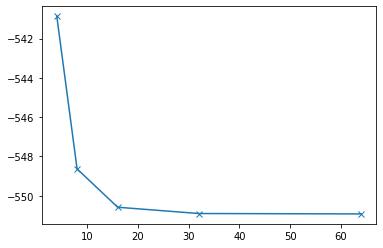

In [5]:
Mx_list_fo = 2**(np.arange(2,7))
My_list_fo = 2**(np.arange(2,7))

folder = 'results/numerics_verification/fo/'

E_size_fo_arr = get_E_arr(Mx_list_fo, My_list_fo, folder, check_sys)
print((E_size_fo_arr-E_size_fo_arr[-1])/200)
plt.plot(Mx_list_fo, E_size_fo_arr.real, marker='x')

[-601.45018058+9.98597421e-17j -595.82906873+1.43669417e-17j
 -587.52007157+5.49719147e-17j -581.44686197+2.78473012e-17j
 -580.3744361 +2.29190220e-17j -580.35152471+7.88355026e-18j
 -580.35103204-8.11067743e-18j]


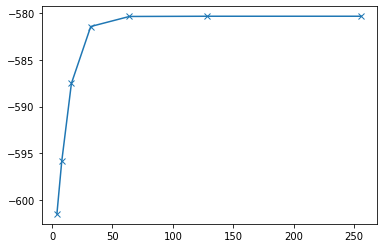

In [6]:
My_list_fdv = 2**(np.arange(2,9))
Mx_list_fdv = 4*np.ones(len(My_list_fdv), dtype=int)

folder = 'results/numerics_verification/fdv/'

E_size_fdv_arr = get_E_arr(Mx_list_fdv, My_list_fdv, folder, check_sys)
print(E_size_fdv_arr)
plt.plot(My_list_fdv, E_size_fdv_arr.real, marker='x')

[-601.45018058+2.61617752e-17j -595.82906873+1.15089378e-16j
 -587.52007157+3.08975865e-17j -581.44686197+7.15354504e-17j
 -580.3744361 +2.24858806e-17j -580.35152471-2.97328043e-17j
 -580.35103204-3.95387349e-17j]


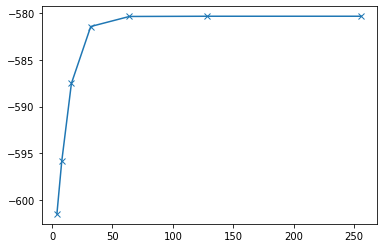

In [7]:
Mx_list_fdh = 2**(np.arange(2,9)) 
My_list_fdh = 4*np.ones(len(Mx_list_fdh), dtype=int)

folder = 'results/numerics_verification/fdh/'

E_size_fdh_arr = get_E_arr(Mx_list_fdh, My_list_fdh, folder, check_sys)
print(E_size_fdh_arr)
plt.plot(Mx_list_fdh, E_size_fdh_arr.real, marker='x')

[-565.61131705-2.13102502e-17j -565.61131705+1.00793601e-16j
 -565.61131705+2.40229373e-16j -565.61131705-4.71780608e-17j
 -565.61131705-2.78013085e-17j]
[-565.61131705-2.13102502e-17j -565.61131705+1.00793601e-16j
 -565.61131705+2.40229373e-16j -565.61131705-4.71780608e-17j
 -565.61131705-2.78013085e-17j]


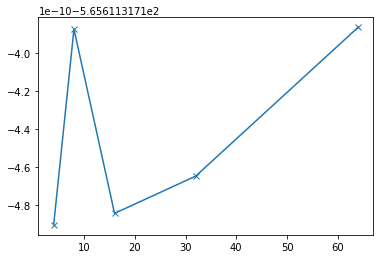

In [8]:
Mx_list_sp = 2**(np.arange(2,7))
My_list_sp = 2**(np.arange(2,7))

folder = 'results/numerics_verification/sp/'

E_size_sp_arr = get_E_arr(Mx_list_sp, My_list_sp, folder, check_sys)
print(E_size_sp_arr)
plt.plot(Mx_list_sp, E_size_sp_arr.real, marker='x')
print(E_size_sp_arr)

In [9]:
def E_to_plot(E,E_0):
    return np.abs(E-E_0)/np.abs(E_0)

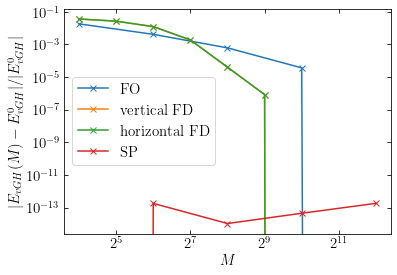

In [10]:
E_0_fo = np.min(E_size_fo_arr)
E_0_fdv = np.max(E_size_fdv_arr)
E_0_fdh = np.max(E_size_fdh_arr)
E_0_sp = np.min(E_size_sp_arr)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font_size = 15

fig, axs = plt.subplots()

axs.plot(Mx_list_fo**2, E_to_plot(E_size_fo_arr, E_0_fo), marker='x', label=r'FO')
axs.plot(My_list_fdv*Mx_list_fdv, E_to_plot(E_size_fdv_arr, E_0_fdv), marker='x', label=r'vertical FD')
axs.plot(Mx_list_fdh*My_list_fdh, E_to_plot(E_size_fdh_arr, E_0_fdh), marker='x', label=r'horizontal FD')
axs.plot(Mx_list_sp**2, E_to_plot(E_size_sp_arr, E_0_sp), marker='x', label=r'SP')


axs.set_xlabel(r'$M$', fontsize=font_size)
axs.set_ylabel(r'$|E_{vGH}(M) - E_{vGH}^0|/|E_{vGH}^0|$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

axs.set_xscale('log', base=2)
axs.set_yscale('log')

plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)

In [11]:
params["tx"] = 95
params["ty"] = 105

params["Mx"] = 4
params["My"] = 20

params["V_0"] = 150

params["tol"] = 1e-7

params["init_choice"] = "ferro_domain_vertical_wall"
psi_fo, E_evo_fo, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

print(E_evo_fo[-1])

NameError: name 'solve_imag_time_prop' is not defined

In [ ]:
params["init_choice"] = "ferro_domain_vertical_wall"
psi_fdv, E_evo_fdv, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "ferro_domain_horizontal_wall"
psi_fdh, E_evo_fdh, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "small_polaron"
psi_sp, E_evo_sp, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

max_psi = np.max(np.array([np.abs(psi_fo)**2,np.abs(psi_fdv)**2,np.abs(psi_fdh)**2,np.abs(psi_sp)**2])).real

## Convergence for eff mass situations

In [48]:
def get_E_arr_eff_mass(Mx_list, My_list, folder, check_sys, check_sym_in):
    h5_io_object = h_in.io_hdf5()
    
    E_s_arr = np.zeros(len(Mx_list), dtype=complex)
    for i in range(len(Mx_list)):
        Mx = Mx_list[i]
        My = My_list[i]

        check_sym = 'Mx_'+str(Mx)+'_My_'+str(My)+check_sym_in
        file_list = [f for f in os.listdir(folder) if check_sys in f and check_sym in f]

        print(file_list)
        if len(file_list) > 1: 
            break
        for file in file_list:
            file_name = folder+file
            psi, params = h5_io_object.get_psi(file_name)

            energy_object = energy.energy(params=params)
            E, E_T, E_B, E_V = energy_object.calc_energy(psi)
            E_s_arr[i] = E
    return E_s_arr

['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_4.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_8_My_8.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_16_My_16.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_32.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_64_My_64.hfd5']
[-540.86111918-7.49527387e-18j -548.63545449-2.72253694e-18j
 -550.58628714+5.65736599e-18j -550.90661992+5.90771889e-18j
 -550.92680807+5.46897629e-18j]


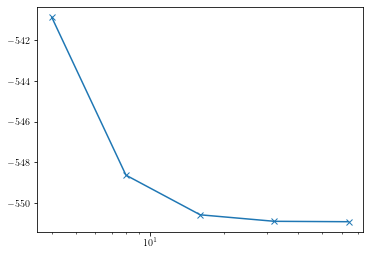

['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_4_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_8_My_8_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_16_My_16_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_32_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_64_My_64_qx_1_qy_0.hfd5']
[-601.45016582-6.75843698e-16j -595.82902663-5.50998987e-16j
 -548.1082698 -4.34084301e-14j -550.25900272-1.53789365e-14j
 -550.75920163-2.05349047e-14j]


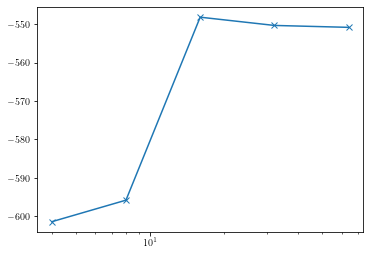

['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_4_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_8_My_8_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_16_My_16_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_32_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_64_My_64_qx_0_qy_1.hfd5']
[-601.45016582-1.24724177e-16j -595.82902663+1.57918926e-16j
 -548.1082698 -1.19719025e-14j -550.25900272+8.44507335e-15j
 -550.75920163-1.37798855e-14j]


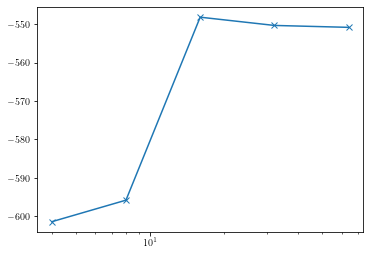

In [70]:
My_list_fo = 2**(np.arange(2,7))
Mx_list_fo = 2**(np.arange(2,7)) #4*np.ones(len(My_list_fdv), dtype=int)

folder = 'results/numerics_verification/fo/'

check_sys = 'tx_100_ty_100_V0_150.0_B_1.0'
check_sym = '.'

E_size_q0_fo_arr = get_E_arr_eff_mass(Mx_list_fo, My_list_fo, folder, check_sys, check_sym)
print(E_size_q0_fdv_arr)
plt.plot(My_list_fo, E_size_q0_fo_arr.real, marker='x')
plt.xscale('log', base=10)
plt.show()


check_sys = 'tx_100_ty_100_V0_150.0'
check_sym = '_qx_1_qy_0'

E_size_qx_fo_arr = get_E_arr_eff_mass(Mx_list_fo, My_list_fo, folder, check_sys, check_sym)
print(E_size_qx_fdv_arr)
plt.plot(My_list_fo, E_size_qx_fo_arr.real, marker='x')
plt.xscale('log', base=10)
plt.show()


check_sys = 'tx_100_ty_100_V0_150.0'
check_sym = '_qx_0_qy_1'

E_size_qy_fo_arr = get_E_arr_eff_mass(Mx_list_fo, My_list_fo, folder, check_sys, check_sym)
print(E_size_qy_fdv_arr)
plt.plot(My_list_fo, E_size_qy_fo_arr.real, marker='x')
plt.xscale('log', base=10)
#plt.yscale('log')

diff qy:  [-60.58904664-1.17228903e-16j -47.19357214+1.60641462e-16j
   2.47801734-1.19775599e-14j   0.6476172 +8.43916563e-15j
   0.16760644-1.37853544e-14j]
diff m:  [ -49.11163137 -153.01467486   32.1376832    33.59607878   34.7793058 ]


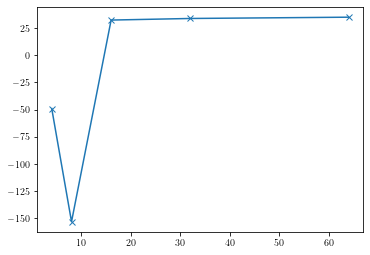

In [99]:
print('diff qy: ', (E_size_qy_fo_arr-E_size_q0_fo_arr)) 
print('diff m: ', 2*(E_size_qy_fo_arr-E_size_q0_fo_arr).real/(2*np.pi/My_list_fo)**2)
plt.plot(My_list_fo, 2*(E_size_qy_fo_arr-E_size_q0_fo_arr).real/(2*np.pi/My_list_fo)**2, marker='x')
#plt.plot(My_list_fo, (E_size_qx_fo_arr-E_size_q0_fo_arr).real, marker='x')
#plt.xscale('log')
#plt.yscale('log')

[35.24200236 -0.16613552 25.21699437]


/mnt/nfs/clustersw/Debian/bullseye/JupyterPython/2.0/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


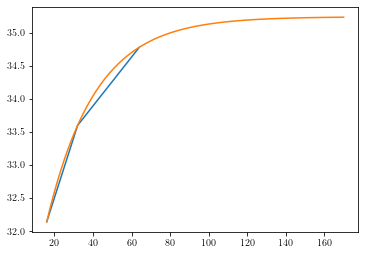

In [134]:
import scipy 

x_e = np.array([16,32,64])
y_e = np.array([32.1376832, 33.59607878, 34.7793058])

a, b = np.polyfit(x_e, y_e, 1)

x = np.linspace(16,170,100)
y = a*x+b

def func(x, m_inf, m_0, a):
    return m_inf*(1+m_0*np.exp(-x/a))
    
popt, pcov = scipy.optimize.curve_fit(func, x_e, y_e, p0 = [35, -1.5, 6]) #bounds=([30,0,-10], [50, 100, 0]))
print(popt)

y = func(x, *popt)

plt.plot(x_e,y_e)
plt.plot(x,y)
#plt.plot(x, func(x, 35, -1.5, 6))

['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_4.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_8.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_16.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_32.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_64.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_4_My_128.hfd5']
[-601.45018058+9.98597421e-17j -595.82906873+1.43669417e-17j
 -587.52007157+5.49719147e-17j -581.44686197+2.78473012e-17j
 -580.3744361 +2.29190220e-17j -580.35152471+7.88355026e-18j]


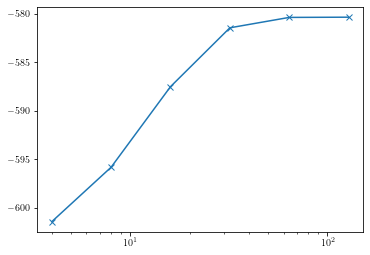

['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_4_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_8_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_16_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_32_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_64_qx_1_qy_0.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_128_qx_1_qy_0.hfd5']
[-601.45018058+4.22817636e-17j -595.82906873+3.75299970e-17j
 -587.52007157+8.12529325e-17j -581.44686197+3.63055376e-17j
 -580.37443609-2.63451714e-17j -580.3515247 -2.14829102e-17j]


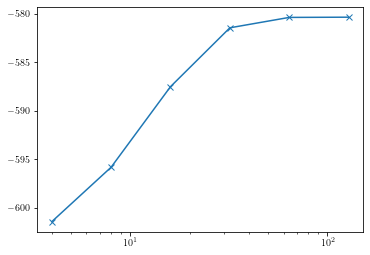

['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_4_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_8_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_16_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_32_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_64_qx_0_qy_1.hfd5']
['tx_100_ty_100_V0_150.0_B_1.0_Mx_32_My_128_qx_0_qy_1.hfd5']
[-565.6110776 -9.43010116e-17j -578.30356138-2.54293309e-15j
 -584.6049759 +8.25408344e-15j -581.20519811+4.71787512e-13j
 -580.34103495+4.56638884e-13j -580.34348668+4.33047778e-13j]


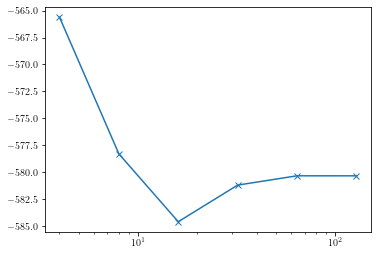

In [78]:
My_list_fdv = 2**(np.arange(2,8))
Mx_list_fdv = 4*np.ones(len(My_list_fdv), dtype=int)

folder = 'results/numerics_verification/fdv/'

Mx_list_fdv = 4*np.ones(len(My_list_fdv), dtype=int)

check_sys = 'tx_100_ty_100_V0_150.0_B_1.0'
check_sym = '.'

E_size_q0_fdv_arr = get_E_arr_eff_mass(Mx_list_fdv, My_list_fdv, folder, check_sys, check_sym)
print(E_size_q0_fdv_arr)
plt.plot(My_list_fdv, E_size_q0_fdv_arr.real, marker='x')
plt.xscale('log', base=10)
plt.show()


Mx_list_fdv = 32*np.ones(len(My_list_fdv), dtype=int)

check_sys = 'tx_100_ty_100_V0_150.0'
check_sym = '_qx_1_qy_0'

E_size_qx_fdv_arr = get_E_arr_eff_mass(Mx_list_fdv, My_list_fdv, folder, check_sys, check_sym)
print(E_size_qx_fdv_arr)
plt.plot(My_list_fdv, E_size_qx_fdv_arr.real, marker='x')
plt.xscale('log', base=10)
plt.show()



check_sys = 'tx_100_ty_100_V0_150.0'
check_sym = '_qx_0_qy_1'

E_size_qy_fdv_arr = get_E_arr_eff_mass(Mx_list_fdv, My_list_fdv, folder, check_sys, check_sym)
print(E_size_qy_fdv_arr)
plt.plot(My_list_fdv, E_size_qy_fdv_arr.real, marker='x')
plt.xscale('log', base=10)
#plt.yscale('log')

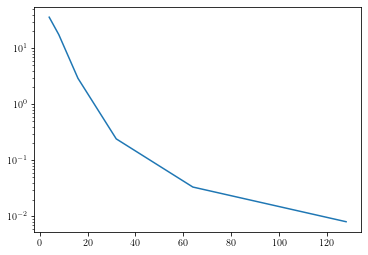

In [86]:
plt.plot(My_list_fdv, (E_size_qy_fdv_arr-E_size_q0_fdv_arr).real)
#plt.xscale('log')
plt.yscale('log')

In [64]:
E_size_qx_fdv_arr-E_size_q0_fdv_arr

array([5.74118530e-11-5.75779785e-17j, 4.42810233e-10+2.31630553e-17j,
       4.16775947e-10+2.62810178e-17j, 8.74251782e-10+8.45823648e-18j,
       3.53327323e-09-4.92641934e-17j, 3.51690232e-09-2.93664605e-17j])